In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
from scipy import stats
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
#from sklearn.neighbors import LocalOutlierFactor

rng = np.random.RandomState(42)

In [2]:
transactions = pd.read_csv('data/reduced_transactions_1p.csv')

In [3]:
labels = transactions['Label']

In [4]:
del transactions['Label']

In [5]:
X_train = transactions.values

In [6]:
outliers_fraction = sum(labels/float(len(labels))) * 2
print(outliers_fraction)

0.00077665302039


# One-class SVM

In [ ]:
clf = svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma='auto')

In [ ]:
clf.fit(X_train)

In [ ]:
pred = clf.predict(X_train)

In [ ]:
pred = (pred - 1)*(-0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

conf_matrix = confusion_matrix(labels, pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Robust covariance

In [ ]:
clf_rc = EllipticEnvelope(contamination=outliers_fraction)

In [ ]:
clf_rc.fit(X_train)

In [ ]:
pred_rc = clf_rc.predict(X_train)

In [ ]:
print(len(pred_rc))
pred_rc = (pred_rc-1)*(-1)/2
print(len(pred_rc[pred_rc==0]))
print(len(pred_rc[pred_rc==1]))

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

conf_matrix = confusion_matrix(labels, pred_rc)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Isolation Forest

In [7]:
clf_if = IsolationForest(max_samples=200, contamination=outliers_fraction, random_state=rng)

In [8]:
clf_if.fit(X_train)

IsolationForest(bootstrap=False, contamination=0.00077665302039043357,
        max_features=1.0, max_samples=200, n_estimators=100, n_jobs=1,
        random_state=<mtrand.RandomState object at 0x000001F2EF49F7E0>,
        verbose=0)

In [9]:
pred_if = clf_if.predict(X_train)

In [10]:
pred_if[pred_if == 1] = 0
pred_if[pred_if == -1] = 1

In [11]:
print(len(pred_if[pred_if==0]))
print(len(pred_if[pred_if==1]))

151816
118


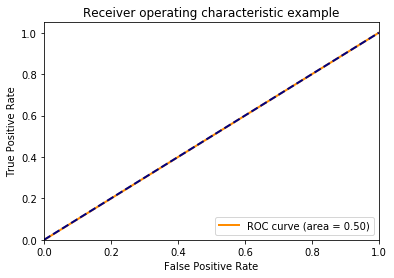

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(labels, pred_if)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

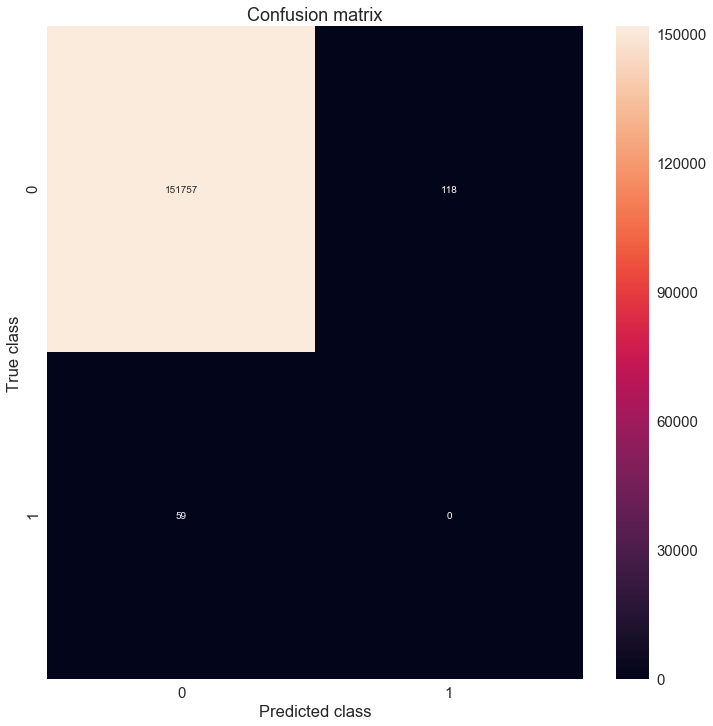

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

conf_matrix = confusion_matrix(labels, pred_if)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
clf_lof = LocalOutlierFactor(n_neighbors=20, contamination=outliers_fraction)

In [ ]:
pred_lof = clf_lof.fit_predict(X_train)

In [ ]:
print(len(pred_lof))
pred_lof = (pred_lof-1)*(-1)/2
print(len(pred_lof[pred_lof==0]))
print(len(pred_lof[pred_lof==1]))

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

conf_matrix = confusion_matrix(labels, pred_lof)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(labels, pred_lof)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()